In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("/content/Light_Rail_Patronage.csv")

In [3]:
data

,Date,MyWay,Paper Ticket,Total
0,22-04-2019,4075,1418,5493
1,23-04-2019,8134,1018,9152
2,24-04-2019,9518,1147,10665
3,25-04-2019,4866,1313,6179
4,26-04-2019,9074,1143,10217
...,...,...,...,...
1337,21-12-2022,9707,526,10233
1338,22-12-2022,8354,464,8818
1339,23-12-2022,8260,596,8856
1340,24-12-2022,4353,337,4690


In [4]:
data.shape

(1342, 4)

EDA

In [5]:
data.isnull().sum()

Date            0
MyWay           0
Paper Ticket    0
Total           0
dtype: int64

There are no missing values in the data

In [6]:
# Corelation of features with the target variable
data.corr().Total.sort_values()


Paper Ticket    0.414834
MyWay           0.998757
Total           1.000000
Name: Total, dtype: float64

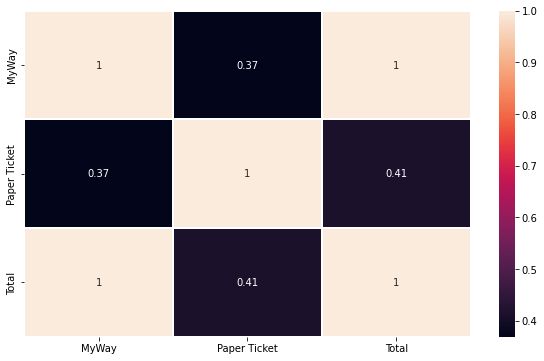

In [7]:
# checking the corelation between the features
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,linewidths=1)

In [8]:
# Convert Month into Datetime
data['Date']=pd.to_datetime(data['Date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1342 non-null   datetime64[ns]
 1   MyWay         1342 non-null   int64         
 2   Paper Ticket  1342 non-null   int64         
 3   Total         1342 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 42.1 KB


In [10]:
#set Date column as an index
data.set_index('Date',inplace=True)

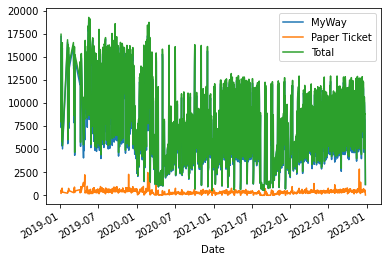

In [11]:
data.plot()

Key Takeaways:

1)More number of patronage boarded through Myway

2)Patronage boarded through Paper Ticket is very less

3)Total number of patronage is more or less equal to the patronage boarded through MyWay.

4)Initially the number of patronage is very high.From 2021 total patronage got decreased

5)The number of patronage from 2021 to 2023 is in same level

In [12]:
data=data.drop(["MyWay","Paper Ticket"],axis=1)
data

,Total
Date,
2019-04-22,5493
2019-04-23,9152
2019-04-24,10665
2019-04-25,6179
2019-04-26,10217
...,...
2022-12-21,10233
2022-12-22,8818
2022-12-23,8856


In [13]:
data=data.reset_index()
data

,Date,Total
0,2019-04-22,5493
1,2019-04-23,9152
2,2019-04-24,10665
3,2019-04-25,6179
4,2019-04-26,10217
...,...,...
1337,2022-12-21,10233
1338,2022-12-22,8818
1339,2022-12-23,8856
1340,2022-12-24,4690


In [14]:
data.head()

,Date,Total
0,2019-04-22,5493
1,2019-04-23,9152
2,2019-04-24,10665
3,2019-04-25,6179
4,2019-04-26,10217


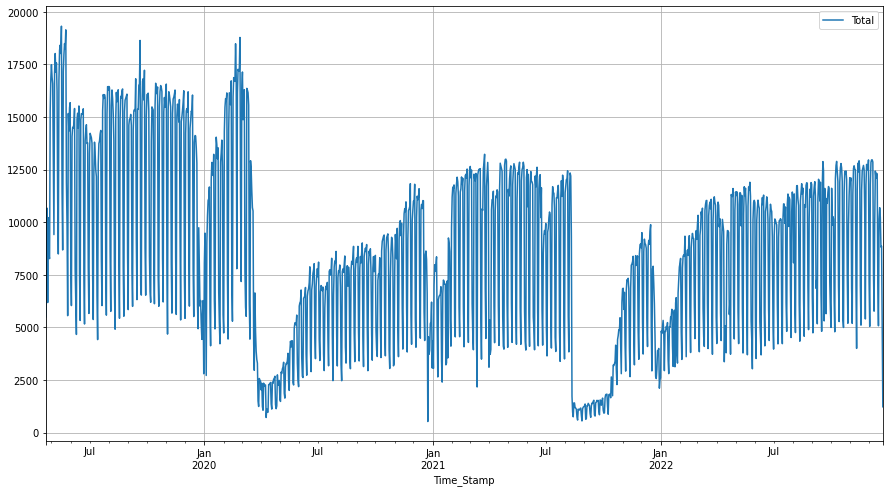

In [15]:
from pylab import rcParams
timestamp=pd.date_range(start='2019-04-22',end='2022-12-23',freq ='D')
data['Time_Stamp']=timestamp
data.drop(labels='Date',axis=1,inplace=True)
data.set_index(keys='Time_Stamp',drop=True,inplace=True)
rcParams['figure.figsize']=15,8
data.plot(grid=True);

There is a seasonality and trends in the time series plot

Initially in 2020 number of patronages are high

Numers of patronage is decreasing in the years of 2021 and 2022

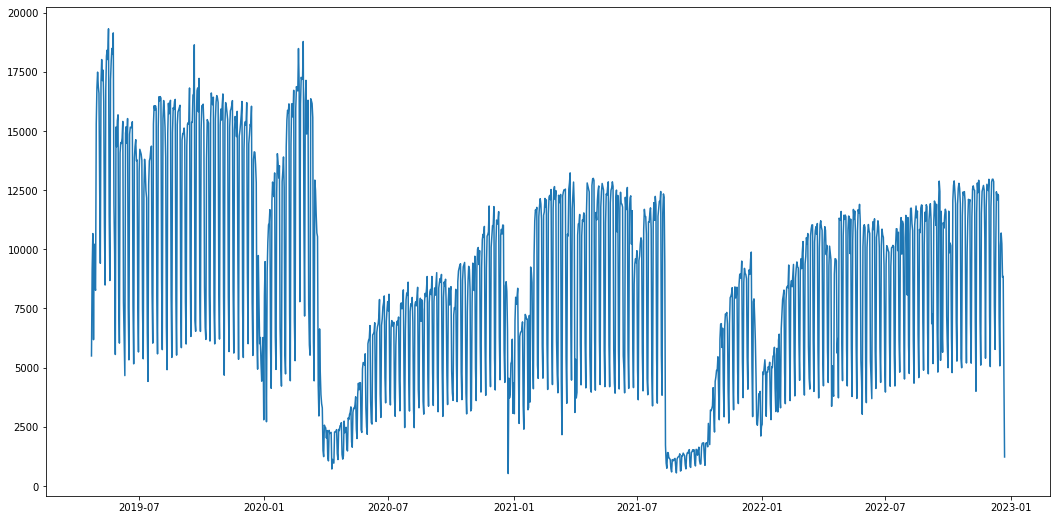

In [16]:
plt.figure(figsize=(18,9))
import matplotlib.pyplot as plt
plt.plot(data)

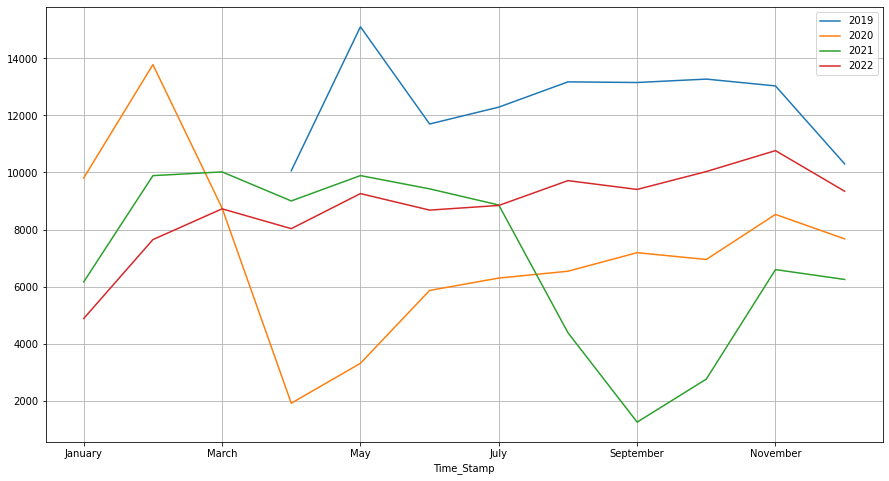

In [17]:
#
months=['January','February','March','April','May','June','July', 'August','September','October','November','December']

month=pd.pivot_table(data,values='Total',columns=data.index.year,index=data.index.month_name())
month=month.reindex(index=months)
month.plot()
plt.grid()
plt.legend(loc='best');

**Key Takeaways:**

In April 2020 there is a huge decrease in total patronage.

Initially in 2019 number of patronages are high

Every year,there is a decrease in April and December.

In [18]:
yearly_plot = data.resample('A').sum()
yearly_plot.head()

,Total
Time_Stamp,
2019-12-31,3215921
2020-12-31,2633766
2021-12-31,2563098
2022-12-31,3130757


STATIONARY AND NON-STATIONARY TESTING




In [19]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [20]:
test_result=adfuller(data["Total"])


In [21]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(total):
    result=adfuller(total)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [22]:
adfuller_test(data['Total'])

ADF Test Statistic : -3.3183714392356447
p-value : 0.014076978459964522
#Lags Used : 21
Number of Observations Used : 1320
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


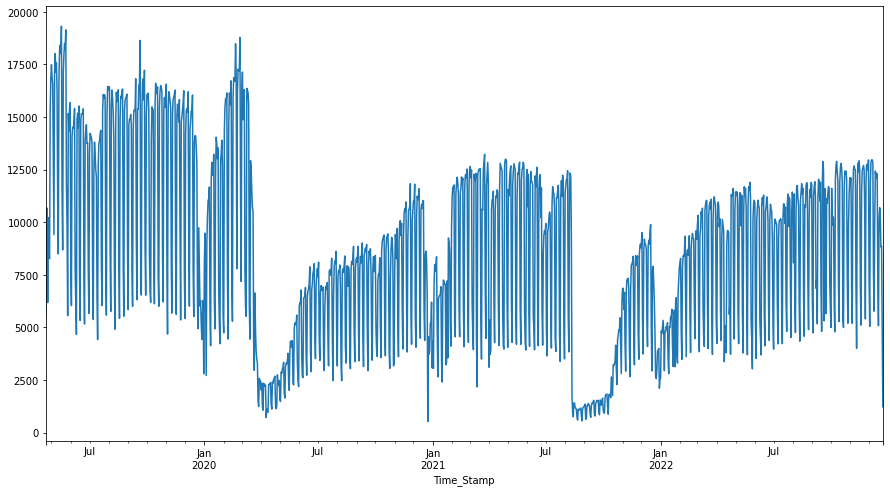

In [23]:
data['Total'].plot()


# Decomposition of Time-series

Trend is long term movement of series,i.e. increasing and decreasing.

In time series data, seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly. Seasonality may be caused by various factors, such as weather, vacation, and holidays[1] and consists of periodic, repetitive, and generally regular and predictable patterns in the levels of a time series.

The error or variability associated with the series is the Irregular component. This is also called white-noise.

Yt: time series value (actual data) at period t.

St: seasonal component (index) at period t.

Tt: trend cycle component at period t.

It: irregular (remainder) component at period t.

Additive model: Observation = Trend + Seasonality + Error , Yt= Tt+ St+ It

Multiplicative model: Observation = Trend * Seasonality * Error ,Yt= Tt* St* It

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose,STL

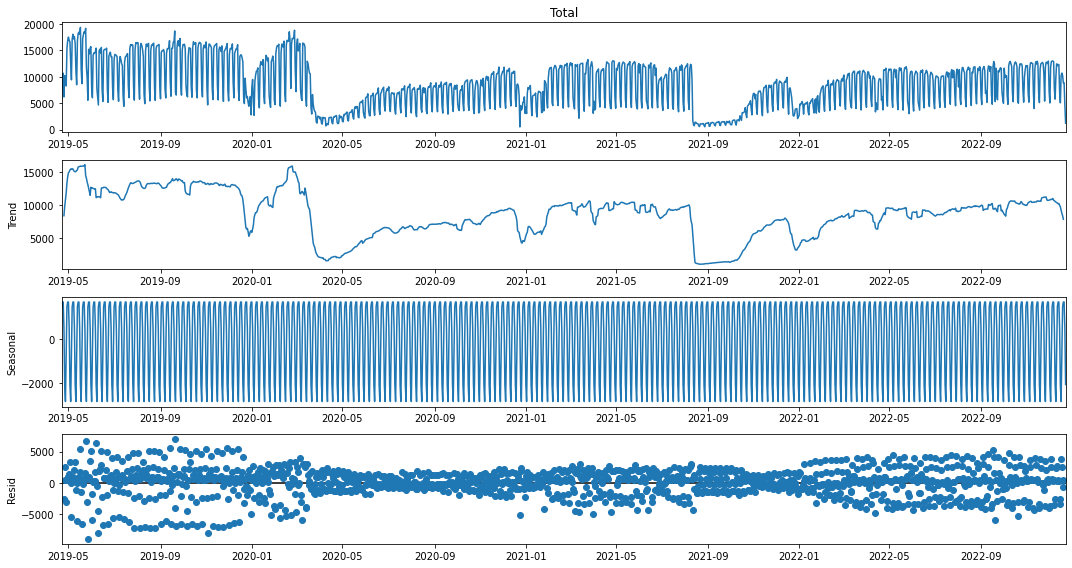

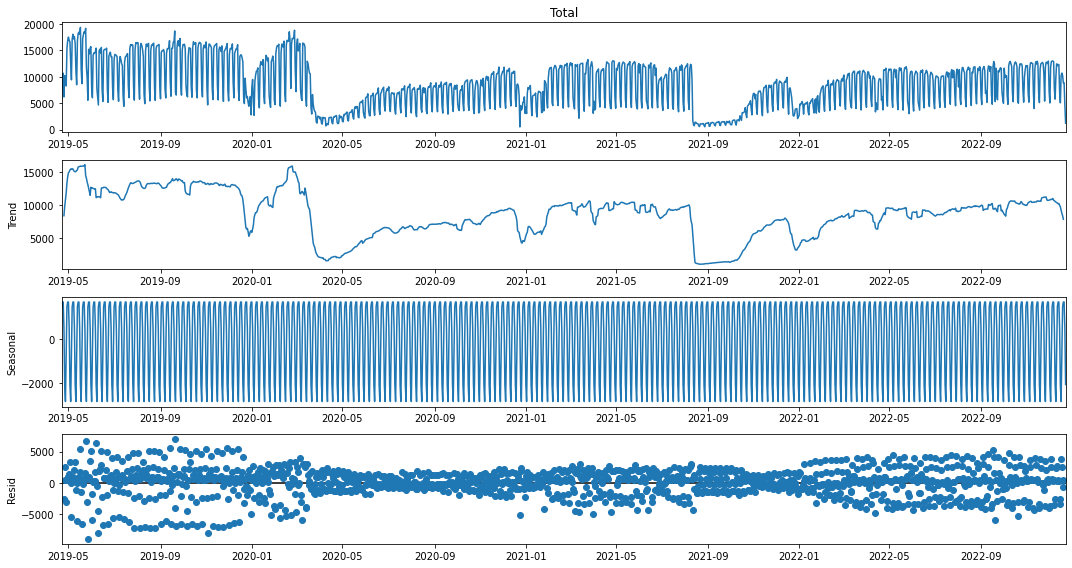

In [25]:
decomposition=seasonal_decompose(data["Total"],model='additive')
decomposition.plot()

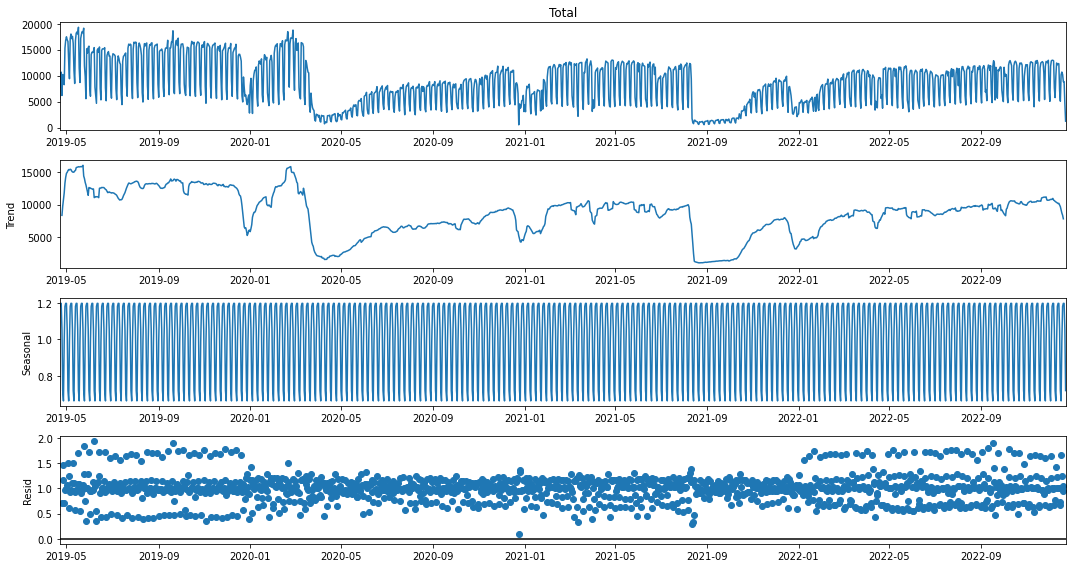

In [26]:
## Decomposition of the TS using the moving average decomposition  
decomposition=seasonal_decompose(data['Total'],model='multiplicative')
decomposition.plot();

If the magnitude of the seasonal component changes with time, then the series is multiplicative. Otherwise, the series is additive.

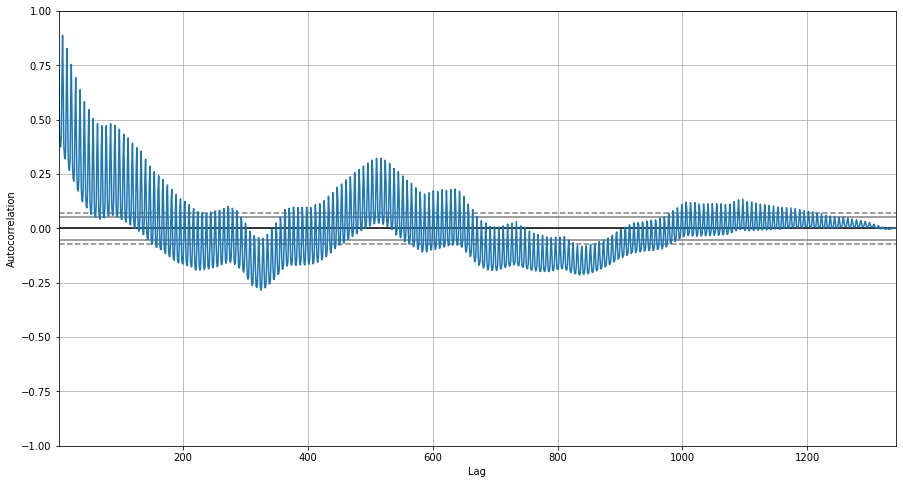

In [27]:
#auto correlation plot
#from pd.tools.plotting import autocorrelation_plot
pd.plotting.autocorrelation_plot(data['Total'])
plt.show()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


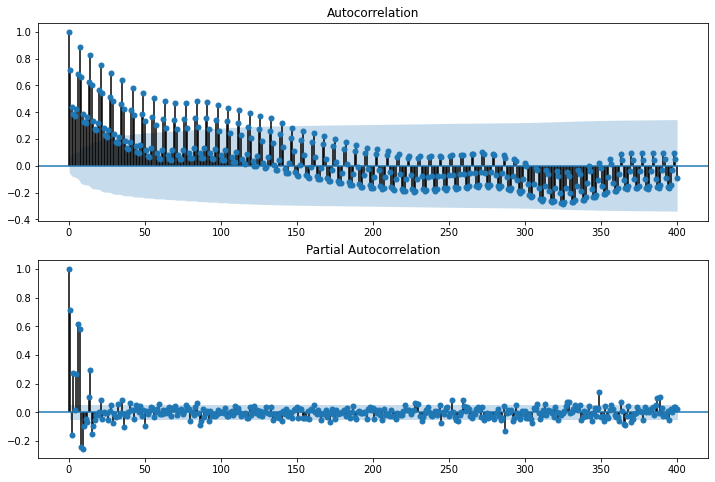

In [29]:
import statsmodels
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(data['Total'],lags=400,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(data['Total'],lags=400,ax=ax2)